<a href="https://colab.research.google.com/github/harshalkumeriya/Deep-Learning-using-Tensorflow/blob/master/MNIST_Data_Augmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

In [22]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [23]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [24]:
print("training data shape ", X_train.shape)
print("validation data shape ", X_valid.shape)
print("testing data shape ", X_test.shape)

training data shape  (50000, 28, 28)
validation data shape  (10000, 28, 28)
testing data shape  (10000, 28, 28)


In [25]:
X_train.dtype

dtype('uint8')

In [26]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [27]:
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

In [28]:
feature_std = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
zca_white = ImageDataGenerator(zca_whitening=True)
random_rotate = ImageDataGenerator(rotation_range=45)
random_shift = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
random_flip = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

In [29]:
augmentation = [feature_std, zca_white, random_rotate, random_shift, random_flip]
augmentation_name = ["feature standardization", "ZCA whitening", "Rotation 45", "Vertical & Horizontal shift 0.2", "vertical & horizontal flip"]

In [30]:
def data_augmentation(transform, transform_name):
  print("="*30+str(transform_name)+"="*30)
  transform.fit(X_train)
  for X_batch, y_batch in transform.flow(X_train, y_train, batch_size=9):
    for i in range(9):
      plt.subplot(330+1+i)
      plt.imshow(X_batch[i].reshape(28,28), cmap = plt.get_cmap('gray'))
    plt.show()
    break

==============================feature standardization==============================


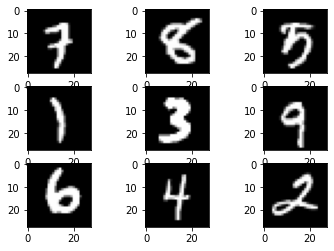

==============================ZCA whitening==============================


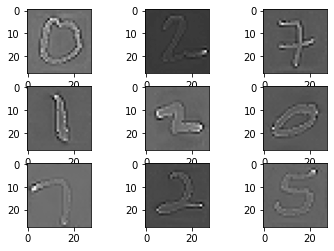

==============================Rotation 45==============================


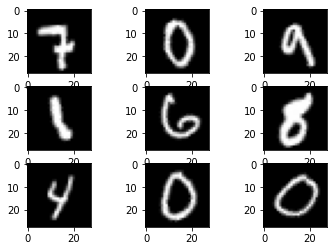

==============================Vertical & Horizontal shift 0.2==============================


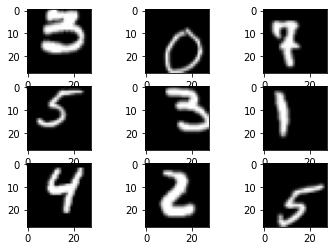

==============================vertical & horizontal flip==============================


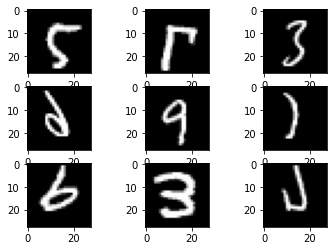

In [31]:
for t, t_name in zip(augmentation, augmentation_name):
  data_augmentation(t, t_name)

In [39]:
batch_size = 64
# batch_size played important role as hyperparameter while training the model.
# I have tried batch_size = 16, 32, 64
# finally 64 is selected
epochs = 20
num_classes = 10
shape_ = (28,28,1)

In [40]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,padding='same', activation='relu', input_shape=shape_),
                                 keras.layers.MaxPool2D(),
                                 keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
                                 keras.layers.MaxPool2D(),
                                 keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
                                 keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(30, activation='relu'),
                                 keras.layers.Dropout(0.25),
                                 keras.layers.Dense(num_classes, activation='softmax')
                                 ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [41]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True, 
                             zca_whitening=True, 
                             rotation_range=45,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             zoom_range = 0.05,
                             horizontal_flip= False,
                             vertical_flip=False,
                             data_format='channels_last')

datagen.fit(X_train, augment=True)

In [43]:
history = model.fit(datagen.flow(X_train, y_train, batch_size= batch_size),
          steps_per_epoch=len(X_train) / batch_size, 
          epochs=epochs, 
          validation_data = (X_valid, y_valid),
          shuffle = True)

Epoch 1/20
782/781 [==============================] - 34s 43ms/step - loss: 1.0007 - accuracy: 0.6440 - val_loss: 46.7757 - val_accuracy: 0.8630
Epoch 2/20
782/781 [==============================] - 34s 43ms/step - loss: 0.4055 - accuracy: 0.8624 - val_loss: 205.4538 - val_accuracy: 0.6675
Epoch 3/20
782/781 [==============================] - 34s 43ms/step - loss: 0.2655 - accuracy: 0.9149 - val_loss: 74.1642 - val_accuracy: 0.7856
Epoch 4/20
782/781 [==============================] - 34s 43ms/step - loss: 0.1924 - accuracy: 0.9441 - val_loss: 84.8624 - val_accuracy: 0.8036
Epoch 5/20
782/781 [==============================] - 33s 43ms/step - loss: 0.1382 - accuracy: 0.9615 - val_loss: 51.3259 - val_accuracy: 0.8620
Epoch 6/20
782/781 [==============================] - 33s 42ms/step - loss: 0.1234 - accuracy: 0.9667 - val_loss: 91.2297 - val_accuracy: 0.7897
Epoch 7/20
782/781 [==============================] - 33s 42ms/step - loss: 0.1069 - accuracy: 0.9721 - val_loss: 52.6327 - val_a

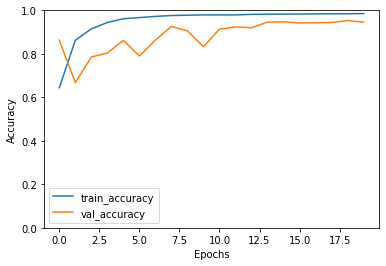

In [44]:
plt.plot(history.history['accuracy'], label = "train_accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [45]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 26.701366424560547
Test accuracy: 0.9408000111579895
